# Support Vector Classifier Implementation

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Lets create synthetic Data Points
from sklearn.datasets import make_classification

In [ ]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

<Axes: xlabel='0', ylabel='1'>

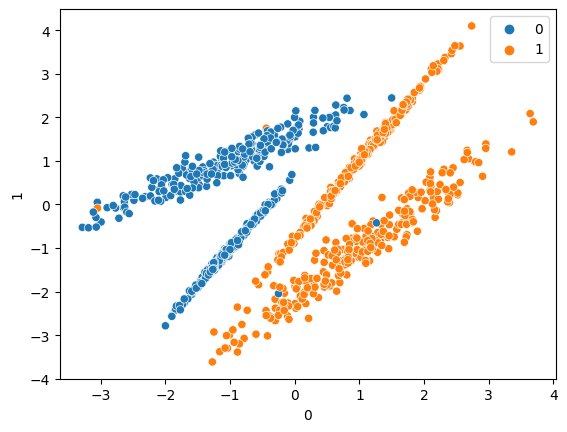

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y )

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=42 )

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svc.coef_

array([[-0.16696979,  1.43371231]])

In [ ]:
# Prediction
y_pred=svc.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       148
           1       0.90      0.86      0.88       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[133  15]
 [ 22 130]]
0.8766666666666667


# Hyperparameter Tuning with SVC


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameter= {'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,.01,.001,.0001],
            'kernel':['linear', 'rbf' ]

}

In [46]:
Grid=GridSearchCV(SVC(), param_grid=parameter, refit=True, cv=5, verbose=3)

In [47]:
Grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [48]:
Grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [50]:
y_pred= Grid.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       148
           1       0.98      0.86      0.91       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[145   3]
 [ 22 130]]
0.9166666666666666


BY using parameters and Gridsearch our model has improved significantly